# Домашнее задание по теме: Классификация

## Подготовка окружения

In [19]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [20]:
# !conda install pandas matplotlib numpy seaborn scikit-learn -y

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Загрузка данных

[Gender Classification Dataset](https://www.kaggle.com/elakiricoder/gender-classification-dataset)

In [22]:
df = pd.read_csv('../../data/gender_classification_v7.csv')

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

## Разделить на train/test

- Разделить данные на `y` и `X`.
- `y` - это колонка `gender`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [23]:
target_col = 'gender'
y = df[target_col].copy()
X = df.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Баланс классов

- Проверить классы `y` на сбалансированность.

<AxesSubplot:xlabel='gender', ylabel='count'>

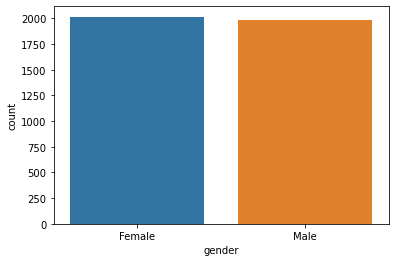

In [24]:
sns.countplot(x=y_train)

## Выбросы

- Есть ли выбросы? Каково распределение данных?
    - `hist`
    - `kde`
    - `boxplot`
- Нужно ли с этим что-то делать?

In [25]:
df_train = X_train.join(y_train)

df_num_cols = df_train.select_dtypes(include=np.number)
df_num_cols_len = len(df_num_cols.columns)

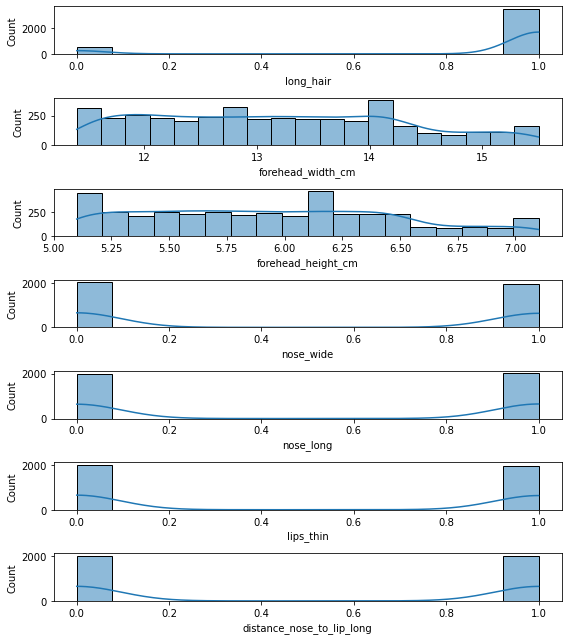

In [26]:
fig, axs = plt.subplots(df_num_cols_len, 1, figsize=(8, 9))

for index, num_col in enumerate(df_num_cols):
    sns.histplot(data=df_train[num_col], 
                 kde=True, 
                 ax=axs[index])
fig.tight_layout()

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Подсказка: в `sns.heatmap` можно указать параметры `vmin`, `vmax` для более адекватного распределения цвета.

Text(0.5, 1.0, 'Correlation Matrix of features')

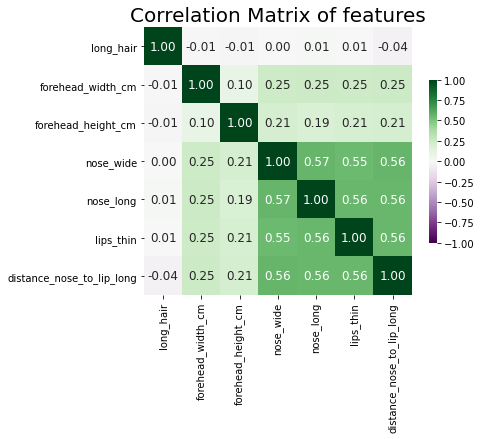

In [27]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(6, 6))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

## Эксперименты с моделями

- Можно использовать любое количество признаков.
- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Провести эксперименты на всех изученных моделях.
    - Попробовать разные модели.
    - Попробовать различные параметры `scoring` для `GridSearch`.
    - Результаты экспериментов желательно собрать в одну таблицу и по возможности визуализировать (`heatmap`, `confusion_matrix`).
- Проанализировать результаты (различные метрики). Написать выводы.

In [35]:
num_cols = ['forehead_width_cm', 'forehead_height_cm']
bin_cols = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('passthrough', 'passthrough', bin_cols),
])

In [36]:
gs_scoring = ['roc_auc', 
              'recall', 
              'precision', 
              'f1', 
              'balanced_accuracy', 
              'accuracy']

In [41]:
models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier, 
                               {'model__max_depth': list(range(3, 8)),
                                'model__min_samples_split': list(range(2, 8))}),
    'LogisticRegression': (LogisticRegression, {}),
    'SVC': (SVC, {}),
    'KNeighborsClassifier': (KNeighborsClassifier, {})
}

In [40]:
import time

total = len(params) * len(gs_scoring)
index = 1
experiments = {}

for name, (model, param_grid) in models.items():
    experiments[name] = {}
    for scoring in gs_scoring:
        start = time.time()
        pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model', model())
        ])
        
        print(f"{name} | {scoring} ...", end=' ')
        model_gs = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=scoring)
        model_gs.fit(X_train, y_train)
        
        experiments[name].update({scoring: model_gs})
        end = time.time()

        print(f"finished! ({end - start:0.2f}s) {index}/{total}")
        index += 1
    print()

NameError: name 'params' is not defined